In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('../data/inmuebles.csv')
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
df['SalePrice'].describe()

count      2925.000000
mean     180815.537436
std       79951.696564
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

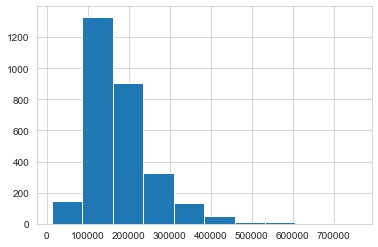

In [20]:
df['SalePrice'].hist()

In [7]:
df.dtypes

Lot Frontage              float64
Lot Area                    int64
Overall Qual                int64
Overall Cond                int64
Year Built                  int64
                           ...   
Sale Condition_AdjLand      int64
Sale Condition_Alloca       int64
Sale Condition_Family       int64
Sale Condition_Normal       int64
Sale Condition_Partial      int64
Length: 274, dtype: object

In [8]:
X = df.drop('SalePrice', axis=1) # todas las columnas menos SalePrice
y = df['SalePrice']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 1. Regresión lineal

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score training: ', model.score(X_train, y_train))
print('R2 score test: ', model.score(X_test, y_test))
print('MAE test: ', mean_absolute_error(y_test, y_pred))

R2 score training:  0.9400589563018396
R2 score test:  0.931854282375192
MAE test:  14680.903865261398


## 2. Regresión Lasso (L1)

In [30]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=80)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score training: ', model.score(X_train, y_train))

print('model.score test: ', model.score(X_test, y_test))
print('r2_score test: ', r2_score(y_test, y_pred)) # la misma que model.score

print('MAE test: ', mean_absolute_error(y_test, y_pred))

R2 score training:  0.928925082411105
model.score test:  0.934540992724742
r2_score test:  0.934540992724742
MAE test:  14142.249722211853


## 3. Regresión Ridge (L2)

In [27]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score training: ', model.score(X_train, y_train))
print('R2 score test: ', model.score(X_test, y_test))
print('MAE test: ', mean_absolute_error(y_test, y_pred))

R2 score training:  0.9337283168864341
R2 score test:  0.9348737456444416
MAE test:  14239.462158710212


## 4. Regresión ElasticNet (L1 + L2)

In [35]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score training: ', model.score(X_train, y_train))
print('R2 score test: ', model.score(X_test, y_test))
print('MAE test: ', mean_absolute_error(y_test, y_pred))

R2 score training:  0.9333711333407806
R2 score test:  0.9348373339270899
MAE test:  14239.75209243257


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.862e+11, tolerance: 1.372e+09
  model = cd_fast.enet_coordinate_descent(


## Búsqueda de Hiperparámetros

In [43]:
model = ElasticNet()

In [44]:
param_grid = {
    'alpha': [0.001, 0.01, 1, 5, 10, 20, 50],
    'l1_ratio': [0, 0.2, 0.5, 0.7, 1]
}

In [45]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_model.fit(X_train, y_train)

C:\Users\alanj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.379e+11, tolerance: 1.096e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\alanj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.509e+11, tolerance: 1.110e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 20, 50],
                         'l1_ratio': [0, 0.2, 0.5, 0.7, 1]},
             scoring='neg_mean_squared_error')

In [46]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.7}

In [58]:
grid_model.cv_results_

{'mean_fit_time': array([0.26253996, 0.3005578 , 0.26455903, 0.26089454, 0.21853914,
        0.28135338, 0.30399175, 0.27262058, 0.27738409, 0.22682395,
        0.28238564, 0.26272607, 0.25173697, 0.25193114, 0.19406428,
        0.29591074, 0.60795469, 0.49171576, 0.33745084, 0.28134847,
        0.61916151, 0.29944711, 0.28133616, 0.26459074, 0.13115897,
        0.26836843, 0.29056153, 0.2967392 , 0.25943017, 0.10128007,
        0.27501154, 0.26328053, 0.26478791, 0.27989264, 0.06283426]),
 'std_fit_time': array([0.02995285, 0.0361901 , 0.00582833, 0.01366832, 0.01224111,
        0.0099943 , 0.0119583 , 0.02837247, 0.01390465, 0.01212098,
        0.01632372, 0.00172914, 0.01046997, 0.00349473, 0.00759585,
        0.01635246, 0.44099634, 0.21211271, 0.0726917 , 0.03712898,
        0.56140775, 0.01734533, 0.02274951, 0.01755499, 0.03791895,
        0.02539949, 0.01538251, 0.01482564, 0.01349205, 0.016739  ,
        0.02364167, 0.00935898, 0.01680414, 0.00816722, 0.02301911]),
 'mean_scor

In [47]:
y_pred = grid_model.predict(X_test)
print('R2 score test: ', r2_score(y_test, y_pred))
print('MAE test: ', mean_absolute_error(y_test, y_pred))

R2 score test:  0.9349143509437499
MAE test:  14249.966668833347


## Búsqueda del mejor alpha

In [49]:
alphas = np.linspace(0.01, 500, 100)
alphas

array([1.00000000e-02, 5.06040404e+00, 1.01108081e+01, 1.51612121e+01,
       2.02116162e+01, 2.52620202e+01, 3.03124242e+01, 3.53628283e+01,
       4.04132323e+01, 4.54636364e+01, 5.05140404e+01, 5.55644444e+01,
       6.06148485e+01, 6.56652525e+01, 7.07156566e+01, 7.57660606e+01,
       8.08164646e+01, 8.58668687e+01, 9.09172727e+01, 9.59676768e+01,
       1.01018081e+02, 1.06068485e+02, 1.11118889e+02, 1.16169293e+02,
       1.21219697e+02, 1.26270101e+02, 1.31320505e+02, 1.36370909e+02,
       1.41421313e+02, 1.46471717e+02, 1.51522121e+02, 1.56572525e+02,
       1.61622929e+02, 1.66673333e+02, 1.71723737e+02, 1.76774141e+02,
       1.81824545e+02, 1.86874949e+02, 1.91925354e+02, 1.96975758e+02,
       2.02026162e+02, 2.07076566e+02, 2.12126970e+02, 2.17177374e+02,
       2.22227778e+02, 2.27278182e+02, 2.32328586e+02, 2.37378990e+02,
       2.42429394e+02, 2.47479798e+02, 2.52530202e+02, 2.57580606e+02,
       2.62631010e+02, 2.67681414e+02, 2.72731818e+02, 2.77782222e+02,
      

C:\Users\alanj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.108e+11, tolerance: 1.372e+09
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'coeffs based on alpha')

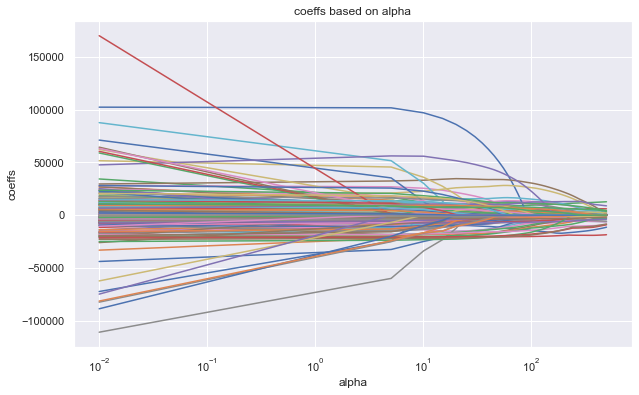

In [56]:
model = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

sns.set()
plt.figure(figsize=(10,6))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coeffs')
plt.title('coeffs based on alpha')

## Evaluación MAE/MSE

C:\Users\alanj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+11, tolerance: 1.372e+09
  model = cd_fast.enet_coordinate_descent(


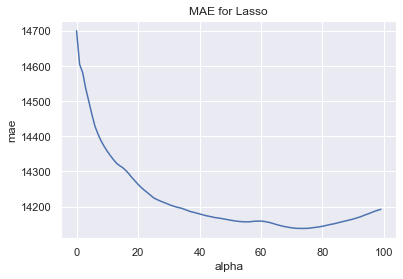

In [57]:
errors = []

for i in range(1, 101):
    model = Lasso(alpha=i, max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    errors.append(mean_absolute_error(y_test, y_pred))

plt.plot(errors)
plt.title('MAE for Lasso')
plt.xlabel('alpha')
plt.ylabel('mae')
plt.show()